## Python Exercise : DBScan

Analyze data "ilustrasi k means.csv"
1. Plot the data using scatter plot
2. Make inital clustering
3. Determine the optimal hyperparameter
    - minimum sample per cluster
    - apsilon
4. Plot the data and clustering result (optimal hyperparameter) using scatterplot 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
x = pd.read_csv('data/ilustrasi k means.csv', sep=';')
x

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


### EDA

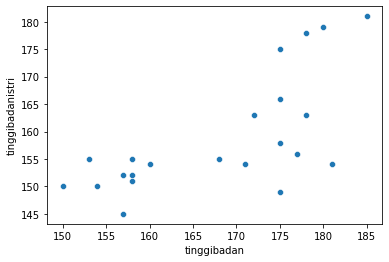

In [3]:
sns.scatterplot(data=x,x='tinggibadan',y='tinggibadanistri')
plt.show()

### DBScan

In [4]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [5]:
dbscan = DBSCAN(eps=0.7,min_samples=5)
label = dbscan.fit_predict(x_scaled)
label

array([-1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        1,  1,  1,  1,  1], dtype=int64)

note :
1. -1 = noise
2. 0 dan 1 adalah cluster

In [6]:
silhouette_score(x_scaled, label)

0.6161772649616482

### Optimize eps and min sample

In [7]:
eps_arr = [0.5,0.6,0.7,0.8]
ms_arr = [2,3,4,5,6,7]
score = []
epsilon = []
min_sample = []
keanggotaan = []
for eps in eps_arr:
    for ms in ms_arr:
        dbscan = DBSCAN(eps=eps,min_samples=ms)
        label = dbscan.fit_predict(x_scaled)
        score.append(silhouette_score(x_scaled, label))
        epsilon.append(eps)
        min_sample.append(ms)
        keanggotaan.append(np.unique(label))
            

In [8]:
df = pd.DataFrame({
    'score':score,
    'eps':epsilon,
    'min_sample':min_sample
})
df.sort_values('score', ascending=False)

,score,eps,min_sample
12,0.616177,0.7,2
22,0.616177,0.8,6
21,0.616177,0.8,5
15,0.616177,0.7,5
14,0.616177,0.7,4
13,0.616177,0.7,3
10,0.530094,0.6,6
17,0.530094,0.7,7
11,0.530094,0.6,7
23,0.516112,0.8,7


In [9]:
eps_arr = [0.6,0.65,0.7]
ms_arr = [3,4,5,6]
for eps in eps_arr:
    for ms in ms_arr:
        print('epsilon', eps)
        print('min samples', ms)
        
        dbscan = DBSCAN(eps=eps,min_samples=ms)
        label = dbscan.fit_predict(x_scaled)
        print('score', silhouette_score(x_scaled, label))
        
        print('keanggotaan cluster', np.unique(label))
        print('freq keanggotaan cluster', np.bincount(label+1)) 
        print()

epsilon 0.6
min samples 3
score 0.4618572923610629
keanggotaan cluster [-1  0  1  2]
freq keanggotaan cluster [1 4 8 9]

epsilon 0.6
min samples 4
score 0.3901682187136734
keanggotaan cluster [-1  0  1]
freq keanggotaan cluster [7 6 9]

epsilon 0.6
min samples 5
score 0.35497113213899967
keanggotaan cluster [-1  0  1]
freq keanggotaan cluster [8 5 9]

epsilon 0.6
min samples 6
score 0.5300936637683802
keanggotaan cluster [-1  0]
freq keanggotaan cluster [13  9]

epsilon 0.65
min samples 3
score 0.6161772649616482
keanggotaan cluster [0 1 2]
freq keanggotaan cluster [0 4 9 9]

epsilon 0.65
min samples 4
score 0.6161772649616482
keanggotaan cluster [0 1 2]
freq keanggotaan cluster [0 4 9 9]

epsilon 0.65
min samples 5
score 0.4839777372002889
keanggotaan cluster [-1  0  1]
freq keanggotaan cluster [6 7 9]

epsilon 0.65
min samples 6
score 0.5300936637683802
keanggotaan cluster [-1  0]
freq keanggotaan cluster [13  9]

epsilon 0.7
min samples 3
score 0.6161772649616482
keanggotaan cluster

1. Ada epsilon beda tp hasil scorenya sama karena datanya sedikit

### Final Clustering

In [10]:
dbscan = DBSCAN(eps=0.7,min_samples=4)
label = dbscan.fit_predict(x_scaled)
label

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

Tidak ada nilai minus, sudah bagus

In [11]:
x['cluster'] = label
x

,tinggibadan,tinggibadanistri,cluster
0,175,175,0
1,178,178,0
2,175,166,1
3,180,179,0
4,185,181,0
5,178,163,1
6,175,158,1
7,181,154,1
8,168,155,1
9,171,154,1


<AxesSubplot:xlabel='tinggibadan', ylabel='tinggibadanistri'>

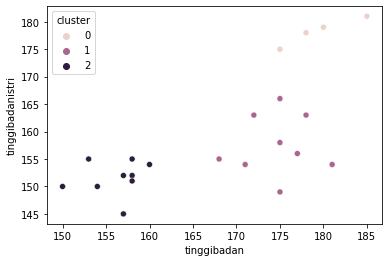

In [12]:
sns.scatterplot(data=x, x='tinggibadan',y='tinggibadanistri', hue='cluster')